In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

In [18]:
data_dir = '/home/gianvito/Documents/GitHub/odysseus-escooter-dqn/odysseus/city_data_manager/data/Louisville/norm/trips/city_of_louisville'

filenames = ['2019_7.csv', '2019_8.csv', '2019_9.csv']

In [26]:
for idx, fn in enumerate(filenames):
    
    file_path = data_dir + '/' + fn
    print()
    print(fn)
    
    if idx == 0:
        df = pd.read_csv(file_path)
        print('Shape: {:d} x {:d}'.format(df.shape[0], df.shape[1]))
        
    else:
        monthly_df = pd.read_csv(file_path)
        df = df.append(monthly_df, ignore_index=True)
        print('Shape: {:d} x {:d}'.format(monthly_df.shape[0], monthly_df.shape[1]))
    

print()
print('Data loaded successfully\n')
print('Shape: {:d} x {:d}'.format(df.shape[0], df.shape[1]))


2019_7.csv
Shape: 59304 x 24

2019_8.csv
Shape: 59605 x 24

2019_9.csv
Shape: 59109 x 24

Data loaded successfully

Shape: 178018 x 24


In [27]:
df.head()

,Unnamed: 0,start_time,end_time,duration,start_latitude,start_longitude,end_latitude,end_longitude,driving_distance,start_year,end_year,year,start_month,end_month,month,start_day,end_day,day,start_hour,end_hour,start_weekday,end_weekday,start_daytype,end_daytype
0,146991,2019-07-01 00:00:00-04:00,2019-07-02 00:00:00-04:00,540.0,38.255,-85.752,38.252,-85.754,1999.987,2019,2019,2019,7,7,7,1,2,1,0,0,Mon,Tue,weekday,weekday
1,120485,2019-07-01 00:00:00-04:00,2019-07-02 00:00:00-04:00,360.0,38.242,-85.726,38.242,-85.726,0.000,2019,2019,2019,7,7,7,1,2,1,0,0,Mon,Tue,weekday,weekday
2,465004,2019-07-01 00:00:00-04:00,2019-07-01 00:00:00-04:00,300.0,38.242,-85.726,38.253,-85.738,0.000,2019,2019,2019,7,7,7,1,1,1,0,0,Mon,Mon,weekday,weekday
3,469743,2019-07-01 00:00:00-04:00,2019-07-02 00:00:00-04:00,180.0,38.252,-85.754,38.252,-85.754,0.000,2019,2019,2019,7,7,7,1,2,1,0,0,Mon,Tue,weekday,weekday
4,41172,2019-07-01 00:15:00-04:00,2019-07-01 00:30:00-04:00,720.0,38.252,-85.737,38.249,-85.759,1866.440,2019,2019,2019,7,7,7,1,1,1,0,0,Mon,Mon,weekday,weekday


In [30]:
daily_trips_df = df.groupby(['month', 'day']).agg(num_daily_trips=('start_time','count')).reset_index()
daily_trips_df

,month,day,num_daily_trips
0,7,1,1082
1,7,2,1303
2,7,3,1530
3,7,4,2783
4,7,5,2324
...,...,...,...
87,9,26,1830
88,9,27,2272
89,9,28,2679
90,9,29,1646


In [34]:
# Helper function to plot DFs
def plot_DF(X, Y, title="", xlabel='Date', ylabel='Number of Accepted offers', dpi=100):
    plt.figure(figsize=(16,3), dpi=dpi)
    plt.plot(X, Y, color='tab:blue')
    
    plt.title(title, fontsize=12)
    
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    
    plt.show() 

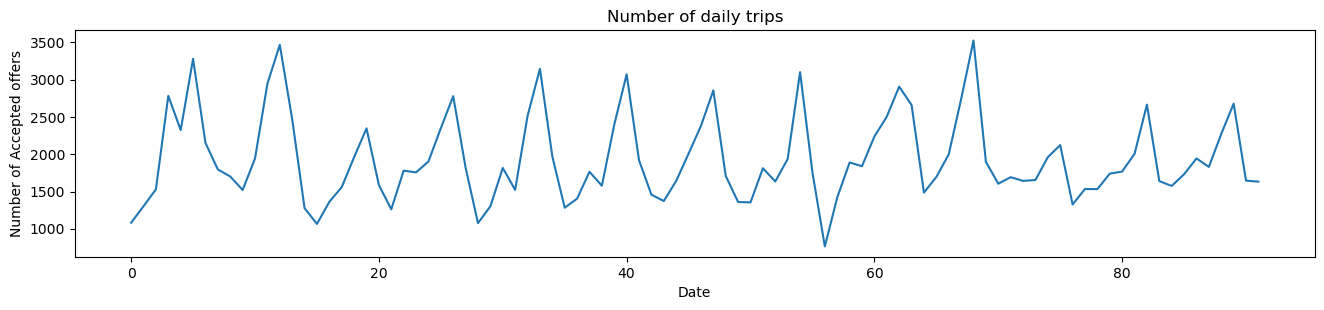

In [35]:
# Plot the target variable of the selected time-series
plot_DF(X=daily_trips_df.index, Y=daily_trips_df.num_daily_trips, title='Number of daily trips')

## Pickle

In [35]:
import pickle
import pandas as pd
pd.set_option('display.max_columns', 500)
import os
import numpy as np

In [5]:
demand_model_path = '/home/gianvito/Documents/GitHub/odysseus-escooter-dqn/odysseus/demand_modelling/demand_models/Louisville'

In [6]:
avg_out_flows_train = pickle.Unpickler(open(os.path.join(demand_model_path, "avg_out_flows_train.pickle"), "rb")).load()
avg_in_flows_train = pickle.Unpickler(open(os.path.join(demand_model_path, "avg_in_flows_train.pickle"), "rb")).load()

In [39]:
zone_list = avg_out_flows_train['weekend'][0].keys()
tot_zones = len(zone_list)


fucked_zone_id = []

out_flows_perzone = {'weekday' : {},
                     'weekend' : {}}

in_flows_perzone = {'weekday' : {},
                    'weekend' : {}}

for daytype in ['weekday', 'weekend']:
    
    blacklist = []
    
    # Init empty list for each zone_id
    for zone_id in zone_list:

        out_flows_perzone[daytype][zone_id] = []
        in_flows_perzone[daytype][zone_id] = []
    
    # Collect from dict and append to list
    for hour in range(24):
        
        for zone_id in avg_out_flows_train[daytype][hour].keys():
        
            out_flows_perzone[daytype][zone_id].append(avg_out_flows_train[daytype][hour][zone_id])
            in_flows_perzone[daytype][zone_id].append(avg_in_flows_train[daytype][hour][zone_id])
    
    
    for zone_id in zone_list:
    
        out_flows_perzone[daytype][zone_id] = np.mean(np.array(out_flows_perzone[zone_id]))
        in_flows_perzone[daytype][zone_id] = np.mean(np.array(out_flows_perzone[zone_id]))

KeyError: 89.0

In [36]:
np.mean(np.array([1, 2, 3]))

2.0

In [41]:
for daytype in ['weekday', 'weekend']:
    
    for hour in range(24):
        
        print(len(avg_in_flows_train[daytype][hour].keys()))

395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395
395


# Invalid action probability

Estimate the probability of invalid action for both Rainbow agents on ODySSEUS, as a proxy of the amount of life loss experienced in the early training stages, wherein Q-learning agents tend to favour $\epsilon$-greedy uniform sampling as the policy $\pi$ to select actions.

Let $a_t = (a_{t, P}, a_{t, D})$ be the generic action for ODySSEUS taken at time $t$, defined as the resultling combination of the action picked by the pick-up (P) agent, $a_{t, P}$, and the action picked by the drop-off (D) agent, $a_{t, D}$. A generic action is considered invalid if:

- A) Either zone corresponding to $a_{t, P}$ or $a_{t, D}$ is invalid: $z_{t, P} \notin Z \cup z_{t, D} \notin Z$, with $Z$ the set of valid zones of a given city.

- B) The zones corresponding to $a_{t, P}$ and $a_{t, D}$ are equal: $z_{t, P} = z_{t, D}$

- C) The zones corresponding to $a_{t, P}$ and $a_{t, D}$ are equal to the original zone of opposite type: $z_{t, P} = \hat{z}_{t, D} \cup z_{t, D} = \hat{z}_{t, P}$

- D) The original zones $\hat{z}_{t, P}$ and $\hat{z}_{t, D}$ sono uguali: $\hat{z}_{t, P} = \hat{z}_{t, D}$

- E) The suggested pick-up zone does not have a suitable vehicle ready: $V_{\text{avail}, P} = \emptyset$

Assuming each of these contributions can be reformulated as close-form probabilities, we shall compute the overall probabiliy of invalid action, $p(a_{inv})$ on any given step within the simulation on ODySSEUS. Known $p(a_{inv})$, we are able to compute the winning probability on ODySSEUS with at least one life left, $p(n_l >= 1)$ given the total number of lives when starting the game $N_l$ over a given range of training steps, $N_{steps}$.

Eventually, fixed a target value for $p(n_l >= 1) = \tau$, we can compute the optimal total number of lives $\hat{N}_{l, \tau}$.

In [1]:
import pandas as pd
import pickle5 as pickle
import os
import typing as t

from scipy.stats import binom

Load the demand model for a given city over a full year of trips

In [2]:
METADATA = {
    'City': 'Louisville',
    'N_steps': int(1.3e3),
    'b': 200
}

In [3]:
demand_model_dirpath = ('/home/DiTo/odysseus-escooter-dqn/odysseus/'
                        'demand_modelling/demand_models/') + METADATA['City'] \
                     + ('' if METADATA['b'] == 200 else '-' + str(METADATA['b']))

In [4]:
df_bookings = pd.read_csv(demand_model_dirpath
                          + '/bookings_train.csv')

In [5]:
df_bookings.columns.values

array(['Unnamed: 0', 'start_time', 'end_time', 'duration',
       'start_latitude', 'start_longitude', 'end_latitude',
       'end_longitude', 'driving_distance', 'start_year', 'end_year',
       'year', 'start_month', 'end_month', 'month', 'start_day',
       'end_day', 'day', 'start_hour', 'end_hour', 'start_weekday',
       'end_weekday', 'start_daytype', 'end_daytype', 'geometry', 'date',
       'daytype', 'city', 'euclidean_distance', 'hour',
       'random_seconds_start', 'random_seconds_end', 'random_seconds_pos',
       'ia_timeout', 'avg_speed', 'avg_speed_kmh', 'origin_id',
       'destination_id', 'origin_i', 'origin_j', 'destination_i',
       'destination_j'], dtype=object)

A) Find the probability of invalid zones across both Rainbow agents draws:

In [6]:
# Count NaN ratio in neighbors DF
with open(os.path.join(demand_model_dirpath,
                       "neighbors_dict.pickle"),
          "rb") as f:
    N = pickle.load(f)

    pct_N_nan = N.isna().sum().sum() \
              * 1.0 / N.size

In [7]:
pct_N_nan

0.3467741935483871

In [8]:
pct_A = binom.pmf(1, 2, pct_N_nan) \
      + binom.pmf(2, 2, pct_N_nan)

pct_A

0.57329604578564

B) Find the probability of both zones suggested by the Rainbow agents being equal:

First of all, we have to find the probability of two zones (partially) sharing their 1-hop neighborhood: Let $b$ the side length of all square zones in the operative area, then we are looking for the probability $d(i, j) \leq 2 \sqrt 2 b = 2^{1.5} b$, with $d(i, j)$ being the trip's Euclidean distance between zone $i$ and zone $j$.

In [9]:
num_bookings_2_hop = (df_bookings['euclidean_distance'] 
                      <= (2**1.5)*METADATA['b']).sum()

num_bookings_tot   = df_bookings['euclidean_distance'].size

In [10]:
pct_2_hop  = (1.*num_bookings_2_hop) \
           / num_bookings_tot

Now, compute the probability of the two Rainbow agents to pick a specific action leading to the same zones:

In [11]:
pct_specific_a = 1./9 # 9 possibile actions

In [12]:
# If along the 2 diagonals
pct_same_a_diag = pct_specific_a**2

# If along the 2 cardinal axis
pct_same_a_card = 3*pct_specific_a**2

pct_same_a = (pct_same_a_diag
           + pct_same_a_card) / 2

In [13]:
pct_B = pct_2_hop*pct_same_a

pct_B

0.011340111966272565

C) Find the probability of either zone suggested by the Rainbow agents being equal to the original zone of opposite type: 

In [14]:
num_bookings_1_hop = (df_bookings['euclidean_distance'] 
                      <= (2**0.5)*METADATA['b']).sum()

num_bookings_tot   = df_bookings['euclidean_distance'].size

In [15]:
pct_1_hop  = (1.*num_bookings_1_hop) \
           / num_bookings_tot

In [16]:
pct_specific_a = 1./9 # 9 possibile actions

In [17]:
pct_C = pct_1_hop*(2*pct_specific_a)

pct_C

0.02783380911305872

D) Find the probability of both original zones from ODySSEUS being equal:

In [18]:
pct_D = 0.

E) Find the probability of unavailable vehicles in the pick-up zone suggested by the Rainbow agents:

In [19]:
pct_E = 0.

## Total number of lives optimization

Find the correct number of lives setting to reach a target success probability $p_\tau$ in high-$\epsilon$ scenarios.

In [20]:
def get_prob_1_life(n_lives: int, pct: float,):
    """
    Probability of winning the game with at least 1 life over a fixed number
    of steps given the failure rate per step.
    
    Parameters
    ----------
    n_lives : int
        Number of total lives per game.
    
    pct: float
        Failure rate per step.
    """
    pct_1_life = 0.
    
    for n in range(n_lives):
        pct_1_life += binom.pmf(
            n, METADATA['N_steps'], pct)
        
    return pct_1_life

In [21]:
def get_prob_0_lives(n_lives: int, pct: float,):
    """
    Probability of losing the game with no lives left over a fixed number
    of steps given the failure rate per step.
    
    Parameters
    ----------
    n_lives : int
        Number of total lives per game.
    
    pct: float
        Failure rate per step.
    """
    return 1. - get_prob_1_life(n_lives, pct)

Compute the total probability of life loss in any given step:

In [22]:
# Strong assumption of independency
# between events A, B, C, D and E
pct_m1_life = pct_A + pct_B \
            + pct_C + pct_D \
            + pct_E

In [23]:
def compute_opt_N_lives(init_n_lives: int, pct: float,
                        target_pct_1_life : float,
                        max_iters : int = 100,
                        tol : float = 0.001):
    """
    Compute the optimal total number of lives `\hat{N}_{l, \tau}` given
    an initial guess, the failure rate per step and the target winning probability.
    
    Parameters
    ----------
    init_n_lives : int
        Initial number of total lives per game.
        
    pct : float
        Failure rate per step.
        
    target_pct_1_life : float
        Target winning probability.
        
    max_iters : int
        Maximum number of iterations.
        The default is 100.
        
    tol : float
        Absolulte tolerance.
        The default is 0.0001.
        
    Returns
    -------
    t.Optional[int]
        Optimal number of total lives per game.
        
    t.Optional[float]
        Related winning probability.
        
    t.Optional[float]
        Closest winning probability to target.
    """
    n_lives = init_n_lives
    
    best_dist_1_life = float('inf')
    best_n_lives = None
    
    for i in range(max_iters):
        prob_1_life = get_prob_1_life(n_lives, pct_m1_life)
        dist_1_life = prob_1_life - target_pct_1_life
        
        abs_dist_1_life = abs(dist_1_life)
        
        if abs_dist_1_life <= tol:
            return n_lives, prob_1_life, None

        alpha = -100*(dist_1_life/n_lives)
            
        n_lives += int(alpha*METADATA['N_steps'])
                
        if n_lives <= 0:
            n_lives = 1
            
        if abs_dist_1_life < abs(best_dist_1_life):
            best_dist_1_life = dist_1_life
            best_n_lives = n_lives
            
    return best_n_lives, None, best_dist_1_life

In [24]:
target_pct_1_life = 0.33

In [25]:
opt_n_lives, opt_pct_1_life, best_dist_1_life = \
        compute_opt_N_lives(50, pct_m1_life,
                            target_pct_1_life, 100)

In [26]:
opt_n_lives, opt_pct_1_life, best_dist_1_life

(787, None, 0.0205450683246155)